Consider another unitary operator $\exp(-i\alpha\hat{M}/2)$, where $\hat{M} = (\hat{X} + \hat{Y})/\sqrt{2}$. What kind of rotation on the Bloch sphere is it?

In [6]:
import imageio
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import qutip
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter, LinearLocator
from tqdm import tqdm

Eigenvalues: [-1.  1.]
Eigenstates: [Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[-0.70710678+0.j ]
  [ 0.5       +0.5j]]
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[-0.70710678+0.j ]
  [-0.5       -0.5j]]                                                  ]


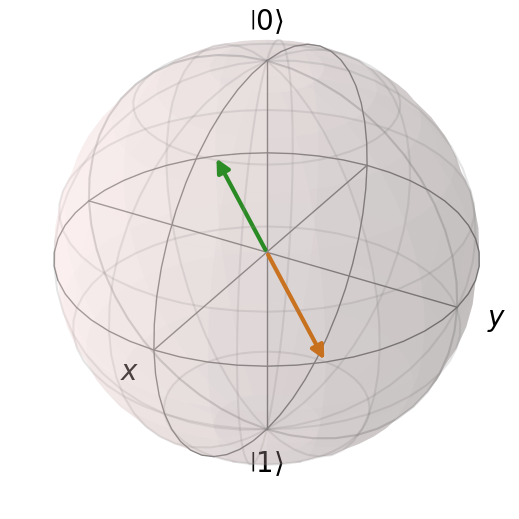

In [7]:
# First, we start with plotting the eigenstates of the operator
M = (qutip.sigmax() + qutip.sigmay()) / np.sqrt(2)
eigvals, eigstates = M.eigenstates()
print("Eigenvalues:", eigvals)
print("Eigenstates:", eigstates)

b = qutip.Bloch()
b.make_sphere()
b.add_states(eigstates)
b.render()
b.show()

In [8]:
alpha = np.pi / 2
rotate_M = (-1j * alpha * M / 2).expm()
up = qutip.basis(2, 0)  # |0>
bloch_states = []
for alpha in np.linspace(0.0, 2 * np.pi, 50):
    rotate_M = (-1j * alpha * M / 2).expm()
    psi = rotate_M * up
    bloch_states.append(psi)

The animated bloch sphere is can be found [here](https://github.com/Gopal-Dahale/qmnp/tree/main/hw1/p1#exercise-35). The axis lies in the X-Y plane as $\phi = \pm \pi/4$ and $\theta = \pi/2$.

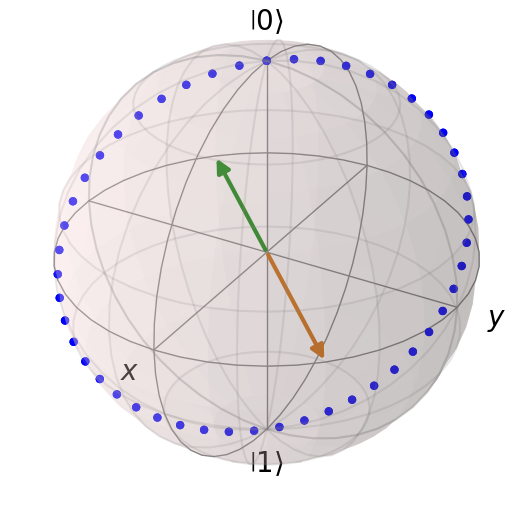

In [9]:
b = qutip.Bloch()
b.point_color = "blue"
b.point_marker = ["o"]
b.point_size = [25]
b.add_states(eigstates)
b.add_states(bloch_states, "point")
b.show()